In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from typing import List, Tuple

In [23]:
def plot_data_hist(data: pd.DataFrame, col_name: str, bins_count: int = 1000)->None:
    """plot a histogram of the given column"""
    data.hist(column=col_name, bins=bins_count)

def print_meta_data(nums: List[float])->None:
    print("+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++")
    # print the min and max values
    print(f"Min: {np.min(nums)}")
    print(f"Max: {np.max(nums)}")
    # print the mean and median values
    print(f"Mean: {np.mean(nums)}")
    print(f"Median: {np.median(nums)}")
    # print the standard deviation
    print(f"Standard Deviation: {np.std(nums)}")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

def get_outliers(nums: List[float], use_iqd: bool = False)-> Tuple[List[int], List[float]]:
    """
    Returns a list of outliers and their indexes in the given list of numbers
    """
    outlier_indecies: List[int] = []
    outlier_values: List[float] = []
    if use_iqd:
        # compute the interquartile range
        q_1: float = float(np.percentile(nums, 25))
        q_3: float = float(np.percentile(nums, 75))
        iqr: float = q_3 - q_1
        # compute the lower and upper bounds
        lower_bound: float = q_1 - (1.5 * iqr)
        upper_bound: float = q_3 + (1.5 * iqr)
        # find the outliers
        for index, num in enumerate(nums):
            if num < lower_bound or num > upper_bound:
                outlier_indecies.append(index)
                outlier_values.append(num)
    else:
        # cast to float beacuse the return type is floating[any]
        mean: float = float(np.mean(nums))
        std: float = float(np.std(nums))
        for index, num in enumerate(nums):
            z_score: float = (num - mean) / std
            if np.abs(z_score) > 3:
                outlier_indecies.append(index)
                outlier_values.append(num)
    return outlier_indecies, outlier_values

def substitute_outliers_with_mean(nums: List[float], outlier_indexes:List[int])->List[float]:
    """return a list of numbers with outliers replaced by the most frequent value"""
    mean: float = float(np.mean(nums))
    for index in outlier_indexes:
        nums[index] = mean
    return nums

def numbers_datacleaning_pipe(nums: List[float])->List[float]:
    """returns a list of numbers with outliers replaced by the mean"""
    outlier_indexes, outlier_values = get_outliers(nums)
    # if there are no outliers, return the original list
    if len(outlier_indexes) == 0:
        return nums
    else:
        return substitute_outliers_with_mean(nums, outlier_indexes)

def clean_data(data: pd.DataFrame)->pd.DataFrame:
    data['Levy'] = data['Levy'].str.replace('-', '')
    data['turbo'] = data['Engine volume'].str.contains('Turbo', regex=False)
    data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')
    data['Engine volume'] = data['Engine volume'].str.replace(' ', '')
    
    data.drop('Doors', axis=1, inplace=True)
    data.drop('Color', axis=1, inplace=True)
    data.drop('Wheel', axis=1, inplace=True)
    
    return data

def visualize_data(data: pd.DataFrame)->None:
    """visualize the data"""
    data['turbo'].value_counts().plot.bar()
    plt.show()

    data['Category'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Manufacturer'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Engine volume'].value_counts().plot.bar()
    plt.show()

    data['Drive wheels'].value_counts().plot.bar()
    plt.show()

    data['Airbags'].value_counts().plot.bar()
    plt.show()


         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467              HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels  Airbags  turbo  
0     Automatic          4x4       12  False  
1     Tiptronic          4x4        8  False  
2      Vari

<Axes: >

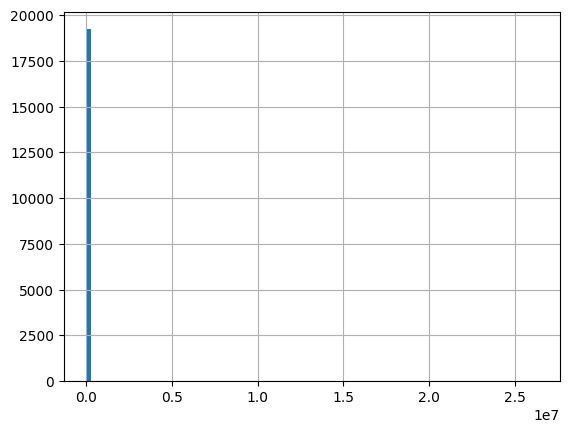

In [24]:
# load the dataset into pandas dataframe
df:pd.DataFrame = pd.read_csv('train.csv')
df = clean_data(df)
print(df.head())
# plot the distribution of the target variable
df['Price'].hist(bins=100)

+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1
Max: 26307500
Mean: 18555.92722357956
Median: 13172.0
Standard Deviation: 190576.31611155753
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1.0
Max: 308906.0
Mean: 17113.29073045021
Median: 13172.0
Standard Deviation: 18276.756081076466
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 178.5
Max: 308906.0
Mean: 18857.837369031386
Median: 14269.0
Standard Deviation: 17407.67227533668
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


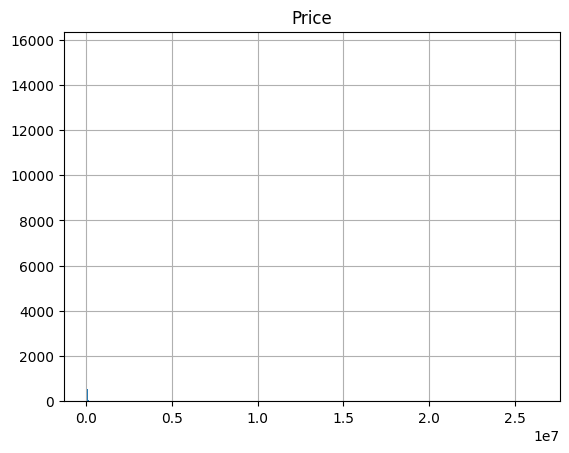

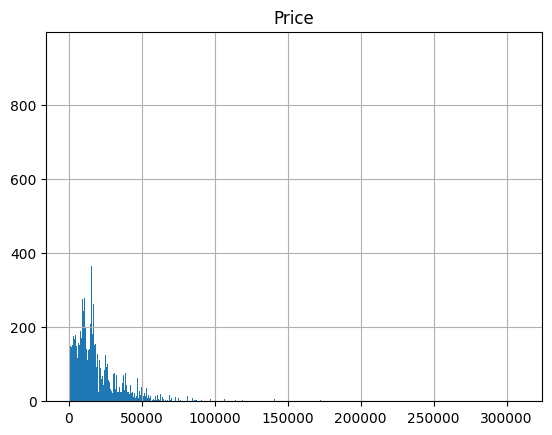

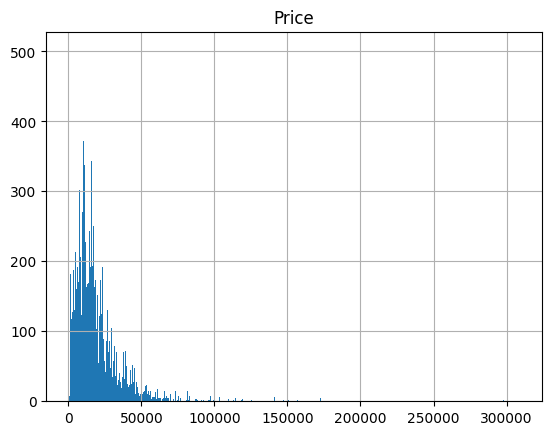

In [25]:
prices_before_cleaning: List[float] = df['Price'].values.tolist()
# print the meta data of the target variable
print_meta_data(prices_before_cleaning)
# plot the distribution of the target variable
plot_data_hist(df, "Price")
# clean prices
prices_after_cleaning: List[float] = numbers_datacleaning_pipe(prices_before_cleaning)
# print the meta data of the target variable
print_meta_data(prices_after_cleaning)
df['Price'] = prices_after_cleaning
# plot the distribution of the target variable
plot_data_hist(df, "Price")
# loop over all prices
prices: List[float] = df["Price"].values.tolist()
for index, price in enumerate(prices):
    # if the price is less than 2000 replace it with the average prices of the same car model
    if price < 1000:
        # get the car model
        car_model: str = df["Model"][index]
        # get the average price of the car model
        average_price: float = df[df["Model"] == car_model]["Price"].mean()
        if average_price == price:
            prices[index] = 1000
        else:
            # replace the price with the average price
            prices[index] = average_price
df["Price"] = prices
# plot the distribution of the target variable
print_meta_data(df["Price"].values.tolist())
plot_data_hist(df, "Price")

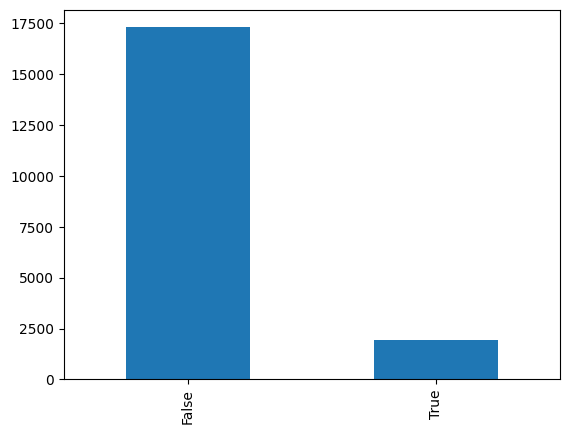

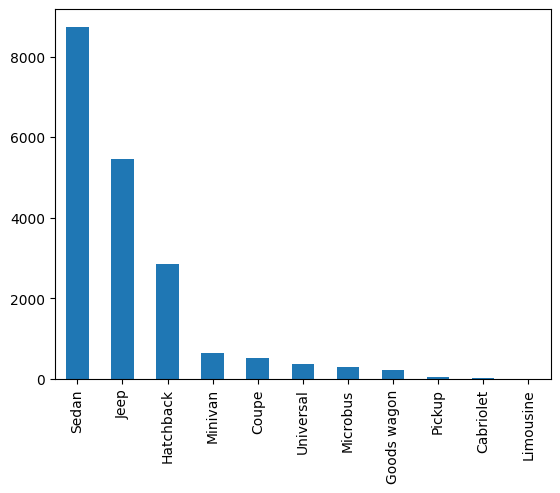

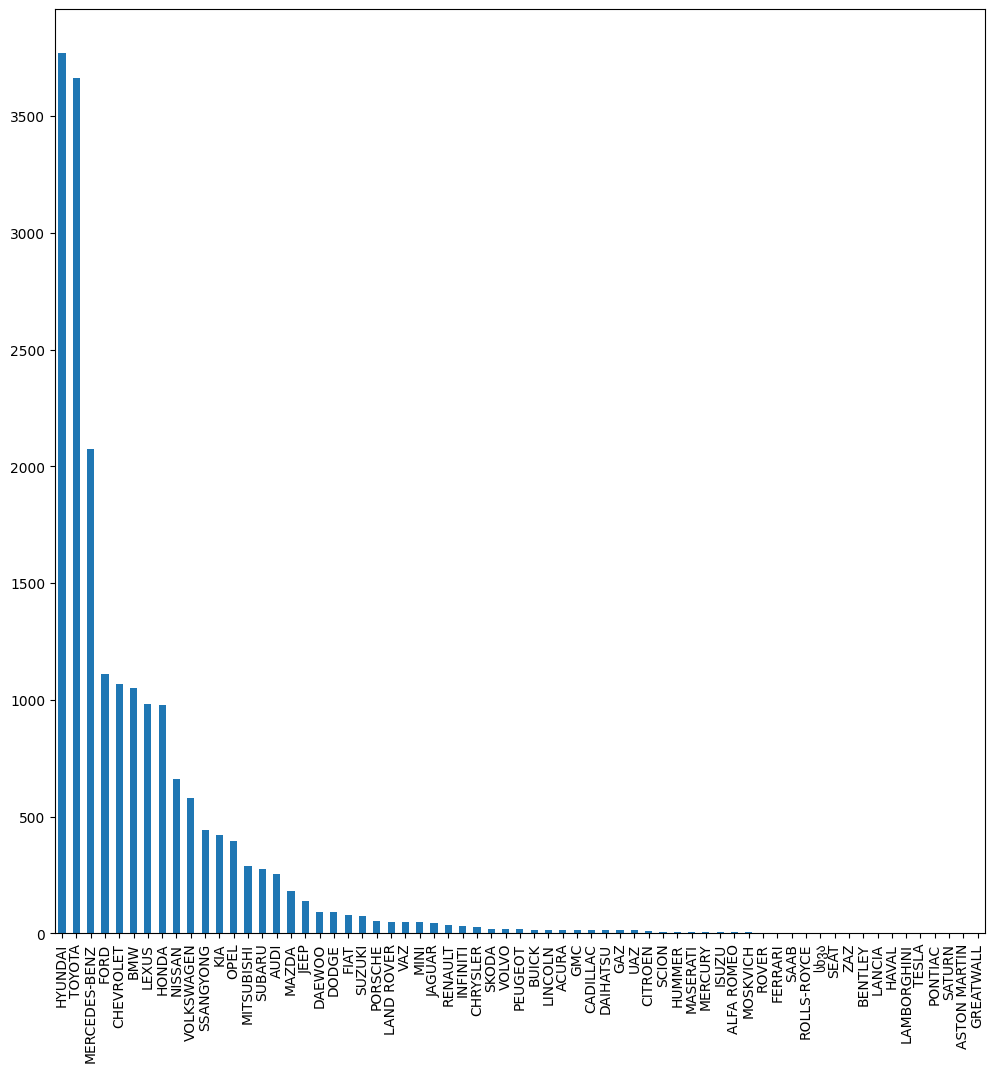

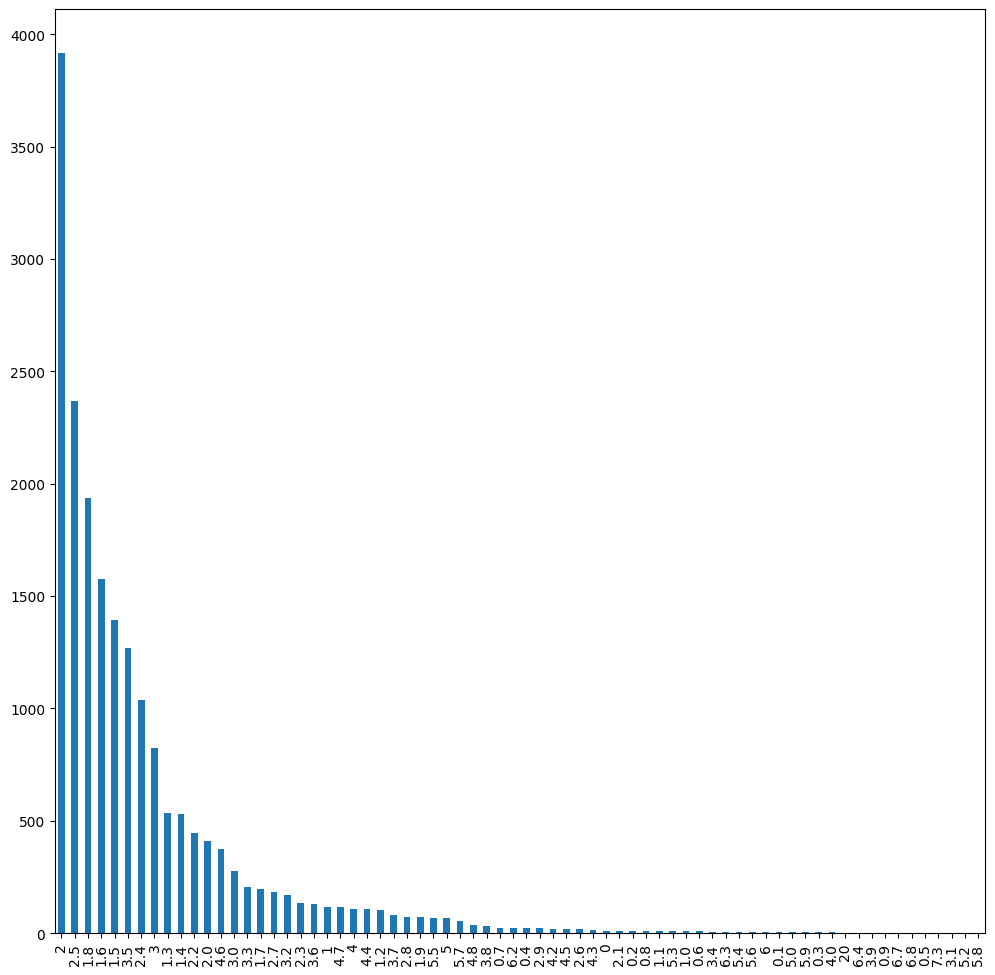

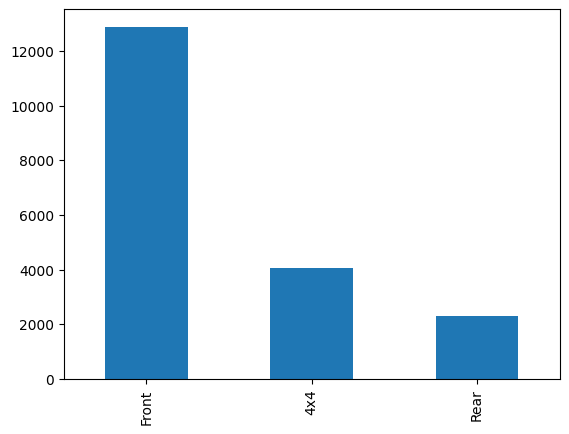

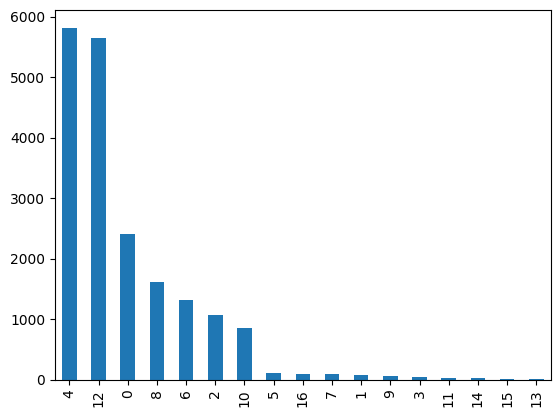

In [26]:
# plot a pie charof the car brands
visualize_data(df)
